Hello! So for this assignment I will be using the same "Computers.csv" file that I've been using for both the Perceptron and Adaline assignments. Nothing has changed, and the file has more than 500 instances, so hurray!

The models are being asked to classify instances based on the RAM space of a computer, with features including the hard drive space as well as the price of the computer. 

The two (technically three) learning algorithms that I am comparing for this assignment is a Support Vector Machine that is using three classifiers (RAM == 2 or 4, RAM == 8, RAM == 16), a Support Vector Machine that is using two classifiers (RAM < 8, RAM >= 8), and an Adaline Gradient Descent version that uses two classifiers (RAM < 8, RAM >= 8). 

The main comparison I wanted to make was to see the variance in the plot decision regions between that of a three vs two classifier SVM. In addition, I compared the two classifier SVM to an Adaline Gradient Descent, just to see how it compared.

(For reference, the red region represents 2 or 4 GB RAM computers, the blue region represents 8 GB RAM computers, and the green region represents 16 GB RAM computers.)



There was much more of a variance between the two SVM than I thought there would be amongst each comparison. In the first comparison, where C == 1 and Gamma == N/A, the three regions did not exist with the initial testing size of 0.3, it only exists with the current testing size of 0.5; testing it with 0.1 and 0.9 results in the blue region to entirely disappear. However, it is worth noting that the line between the red and blue sections between both SVM's are nearly identical, as the line appears to separate the 3rd and 4th "line cluster" of points" with an angle that is visibly undistinguishable. It's also interesting to note that despite - at least visually - there being more blue points compared to green, the SVM created a larger region dedicated to green compared to blue; this may be the result of outliers from the green region taking up more space than the other two regions on the plot.

The Adaline model in the same cell appears less accurate compared to the two classifier SVM. The angle is more acute, and while it attempts to classify more of the blue points correctly, many of the more spread out red points are incorrectly classified. Meanwhile, the SVM's angle has a larger slope that accurately predicts where MOST of each point belongs to; of course with my data it is nearly impossible to completely predict where each region should be plotted, as there are different classified points that have similar features, making it hard for the algorithm to tell which point goes where.

In the second comparison, where C == 1 and Gamma == 100, the entire plot of the three classifier SVM was filled with red, while the clusters of blue and green points had small regions drawn for them. Meanwhile, the entire plot of the two classifier SVM was filled with blue, while the clusters of red points had small regions drawn for them. The reason for this is potentially because the three classifier SVM has less blue overall, as 16 GB RAM computers are given a green point. As a result, there are more red points overall, and so the algorithm uses that as its basis for coloring the plot mostly red. In the two classifier SVM, conjoining the blue and green regions together may result in more blue points than red points being accounted for, and so that becomes the majority color of that plot. 

In the third comparison, where C == 1 and Gamma == 1, both plots are filled with blue as the majority, despite the previous comparisons. I am unsure as to why, though it probably has to do with the lower gamma parameter. Here, the SVM attempts to classify the red points through a more blob-like structure, though it is more accurate with two classifiers rather than three. There is more dead space with the three classifier SVM, as it occupies more space with less actual points in it; meanwhile, although the two classifier SVM is a smaller region, it more accurately plots the region that the red points are in. In addition, the green region for the three classifier SVM congregates where the most green points are, and do not attempt to extend towards outliers, such as the green point at (8,3).

In the fourth comparison, where C == 100000 and Gamma == 1, both plots are filled with red as the majority, which is irregular, to say the least. The second comparison has one of each color representing the majority of the plot, the third comparison has both plots having blue be the majority of the plot, while this comparison has red as the majority of the plot. The blob-like structure from the previous comparison becomes a lot less... cohesive? With C at such a large input, the SVM attempts to include many of the outlying points of both blue and green, resulting in regions that "directionally move" toward their respective points, but often do not include the points being considered. This is mostly seen with the green region in the three classifier SVM. The upper part of the region tries to skew toward the left green points, but never actually includes them in it. The blue region also does this, as a lot of the center spaces of the blue region have dead spaces with no points; although, it does manage to properly classify many of the clustered blue points while minimizing dead space. Interesting to note, that there is a small section of blue in the lower left corner of the plot that goes outside the scope of the plot. Whether there was a point outside the visualized plot or was a result of the extremely high C value, I'm not sure. On the two classifier SVM the lack of a green region resulted in a more accurate, cohesive depiction of the regions between the red and blue points. Obviously there were some mismatches, but besides some outliers, the plot was pretty accurate.

In [1]:
from sklearn import svm
import numpy as np
import pandas as pd
import os

In [2]:
def sift_binary(s):
    zeros = []
    ones = []
    index = 0
    t = s.tolist()
    for value in t:
        if value == 0:
            zeros.append(index)
        else:
            ones.append(index)
        index += 1
    return (zeros, ones)

In [3]:
try:
    s = 'Computers.csv' # This has 6259 entries!
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()

From URL: Computers.csv


,0,1,2,3,4,5,6,7,8,9,10
6255,6255.0,1690,100,528,8,15,no,no,yes,39,35
6256,6256.0,2223,66,850,16,15,yes,yes,yes,39,35
6257,6257.0,2654,100,1200,24,15,yes,no,yes,39,35
6258,6258.0,2195,100,850,16,15,yes,no,yes,39,35
6259,6259.0,2490,100,850,16,17,yes,no,yes,39,35


In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    #edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set') 

In [5]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            
            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [6]:
# Get the RAM values
y =  df.iloc[1:501, 4].values

# Make a copy of y and turn it into float values to work with
yfloat = np.copy(y)
yfloat = y.astype(float)

# Create a list that classifies RAM values into three categories: RAM of 2 or 4, RAM of 8, RAM of 16
ylist = []
for value in yfloat:
    if (value == 2 or value == 4):
        value = 0
    elif (value == 8):
        value = 1
    elif (value == 16):
        value = 2
    ylist.append(value)
yfloat = np.array(ylist)

# Extract hard drive space and price of computer
X = df.iloc[1:501, [3, 1]].values

# Turn the values in X from str to int for the perceptron to use
Xfloat = np.copy(X)
Xfloat = X.astype(float)

#hard_drive_values = [x[0] for x in Xfloat]
#price = [x[1] for x in Xfloat] 

# -----------------------------------------------------------------------

#Repeat the process above, except use a double classifier rather than a triple classifier
bfloat = np.copy(y)
bfloat = y.astype(float)

bfloat = np.where (bfloat < 8, 0, 1)
Afloat = np.copy(X)
Afloat = X.astype(float)



In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Xfloat, yfloat, test_size=0.5, random_state=1, stratify=yfloat)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# -------------------------------------------------------------------------------


A_train, A_test, b_train, b_test = train_test_split(
    Afloat, bfloat, test_size=0.5, random_state=1, stratify=bfloat)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(A_train)
A_train_std = sc.transform(A_train)
A_test_std = sc.transform(A_test)

A_combined_std = np.vstack((A_train_std, A_test_std))
b_combined = np.hstack((b_train, b_test))

In [8]:
# standardize features
A_std = np.copy(Afloat)
A_std[:, 0] = (Afloat[:, 0] - Afloat[:, 0].mean()) / Afloat[:, 0].std()
A_std[:, 1] = (Afloat[:, 1] - Afloat[:, 1].mean()) / Afloat[:, 1].std()

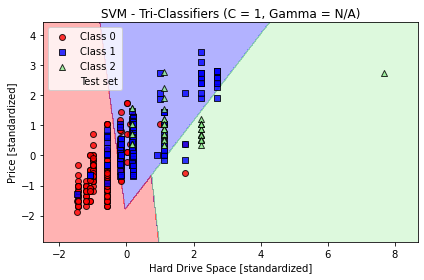

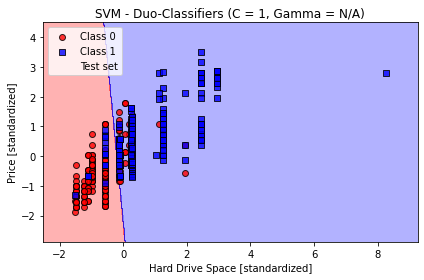

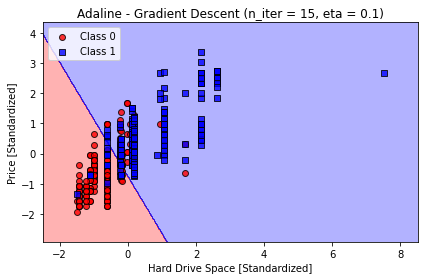

In [9]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.title('SVM - Tri-Classifiers (C = 1, Gamma = N/A)')
plt.xlabel('Hard Drive Space [standardized]')
plt.ylabel('Price [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

# Note: Only achieves this with values near 0.5 for test size; will not work with the initial value of 0.3, does not work for
#0.9

# ---------------------------------------------------------------

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(A_train_std, b_train)

plot_decision_regions(A_combined_std, 
                      b_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.title('SVM - Duo-Classifiers (C = 1, Gamma = N/A)')
plt.xlabel('Hard Drive Space [standardized]')
plt.ylabel('Price [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

# ---------------------------------------------------------------

ada_gd = AdalineGD(n_iter=15, eta=0.1)
ada_gd.fit(A_std, yfloat)
plot_decision_regions(A_std, bfloat, classifier=ada_gd)
plt.title('Adaline - Gradient Descent (n_iter = 15, eta = 0.1)')
plt.xlabel('Hard Drive Space [Standardized]')
plt.ylabel('Price [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

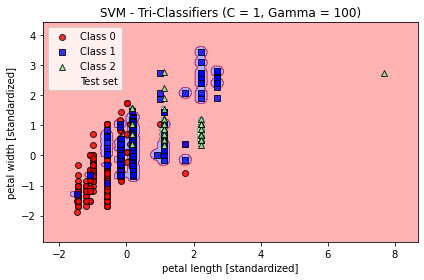

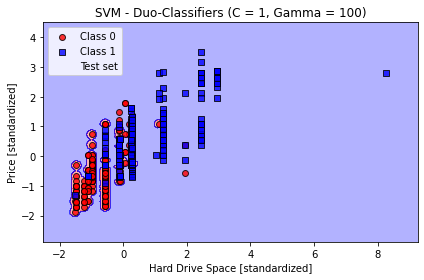

In [10]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.title('SVM - Tri-Classifiers (C = 1, Gamma = 100)')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------

svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(A_train_std, b_train)

plot_decision_regions(A_combined_std, b_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.title('SVM - Duo-Classifiers (C = 1, Gamma = 100)')
plt.xlabel('Hard Drive Space [standardized]')
plt.ylabel('Price [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


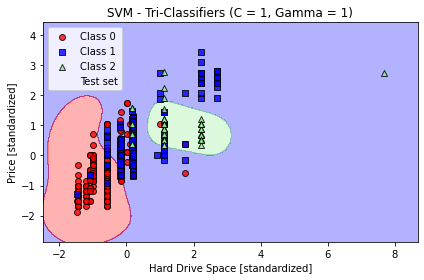

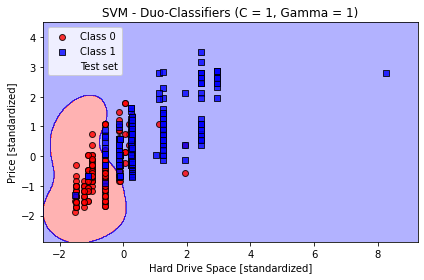

In [11]:
svm = SVC(kernel='rbf', random_state=1, gamma=1.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.title('SVM - Tri-Classifiers (C = 1, Gamma = 1)')
plt.xlabel('Hard Drive Space [standardized]')
plt.ylabel('Price [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------

svm = SVC(kernel='rbf', random_state=1, gamma=1.0, C=1.0)
svm.fit(A_train_std, b_train)

plot_decision_regions(A_combined_std, b_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.title('SVM - Duo-Classifiers (C = 1, Gamma = 1)')
plt.xlabel('Hard Drive Space [standardized]')
plt.ylabel('Price [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

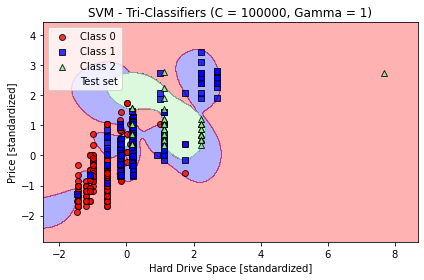

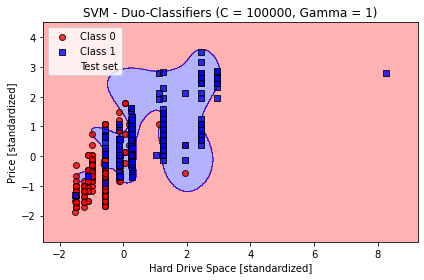

In [12]:
svm = SVC(kernel='rbf', random_state=1, gamma=1, C=100000.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.title('SVM - Tri-Classifiers (C = 100000, Gamma = 1)')
plt.xlabel('Hard Drive Space [standardized]')
plt.ylabel('Price [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------

svm = SVC(kernel='rbf', random_state=1, gamma=1, C=100000.0)
svm.fit(A_train_std, b_train)

plot_decision_regions(A_combined_std, b_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.title('SVM - Duo-Classifiers (C = 100000, Gamma = 1)')
plt.xlabel('Hard Drive Space [standardized]')
plt.ylabel('Price [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()